In [1]:
## import lib  ###
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
### traininig directory path  ###
train_data_dir = 'data/train/'
### model json file  ###
SAVED_MODEL_PATH = 'Model/'
TEST_IMAGE = 'data/validation/1.jpg'
TEST_IMAGE1 = 'data/validation/3.jpg'
TEST_IMAGE2 = 'data/validation/4.jpg'
TEST_IMAGE3 = 'data/validation/6.jpg'
img_list = [TEST_IMAGE, TEST_IMAGE1, TEST_IMAGE2, TEST_IMAGE3]

In [4]:
###   preprocesssing   ###
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

IMAGE_WIDTH = 40
IMAGE_HEIGHT = 40
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=32,
        class_mode='binary')

Found 1656 images belonging to 6 classes.


In [6]:
# load json and create model 
json_file = open(SAVED_MODEL_PATH + 'model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
loaded_model.load_weights(SAVED_MODEL_PATH + "model_withWt.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:
###    testing image    ###
def test_image(path):
    test_image = image.load_img(path, target_size=(40, 40))
    test_image = image.img_to_array(test_image)
    test_image = numpy.expand_dims(test_image, axis = 0)
    return test_image

image_test = test_image(TEST_IMAGE)
image1_test = test_image(TEST_IMAGE1)
image2_test = test_image(TEST_IMAGE2)
image3_test = test_image(TEST_IMAGE3)

result = loaded_model.predict(image_test)
result1 = loaded_model.predict(image1_test)
result2 = loaded_model.predict(image2_test)
result3 = loaded_model.predict(image3_test)

pred = [result, result1, result2, result3]
prediction = []
for i in pred:
    j = numpy.argmax(i[0])
    prediction.append(j)
                              
cls = train_generator.class_indices

In [8]:
cls

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

# Prediction on images

Actual Class - Crazing
Predicted Class - crazing


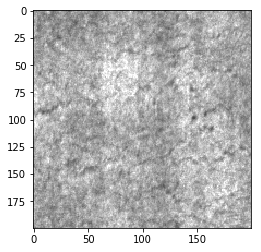

In [9]:
###    prediction for image  ###
img=mpimg.imread(img_list[0])
plt.imshow(img)
print("Actual Class - Crazing")
print("Predicted Class - {}".format(list(cls.keys())[list(cls.values()).index(prediction[0])]))

Actual Class - Patches
Predicted Class - patches


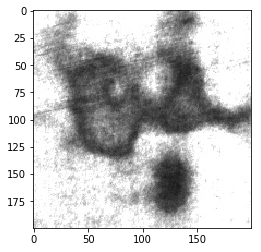

In [10]:
img=mpimg.imread(img_list[1])
plt.imshow(img)
print("Actual Class - Patches")
print("Predicted Class - {}".format(list(cls.keys())[list(cls.values()).index(prediction[1])]))

Actual Class - Pitted Surface
Predicted Class - crazing


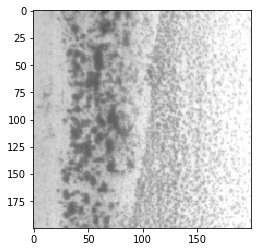

In [11]:
img=mpimg.imread(img_list[2])
plt.imshow(img)
print("Actual Class - Pitted Surface")
print("Predicted Class - {}".format(list(cls.keys())[list(cls.values()).index(prediction[2])]))

Actual class - Scratches
Predicted Class - patches


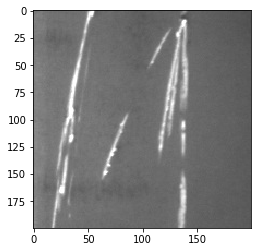

In [13]:
img=mpimg.imread(img_list[3])
plt.imshow(img)
print("Actual class - Scratches")
print("Predicted Class - {}".format(list(cls.keys())[list(cls.values()).index(prediction[3])]))